In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mp

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mp

In [3]:
house_df = pd.read_csv('data/house_train.csv')
house_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# row ,columns 값 확인

In [5]:
house_df.shape

(1460, 81)

In [6]:
house_df.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [7]:
house_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#  값이 나오는 컬럼만 나오게하는것

In [8]:
isnull_series = house_df.isnull().sum()

In [9]:
isnull_series[isnull_series>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_13888\2181838323.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

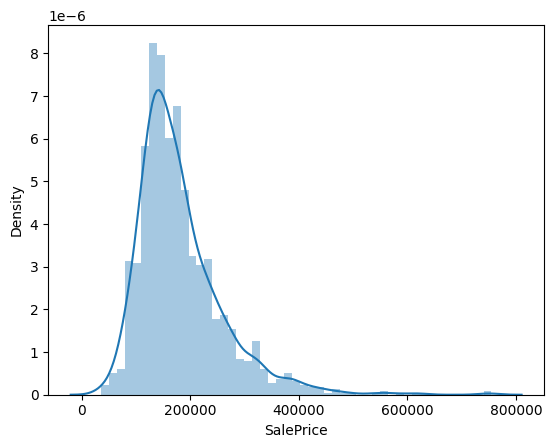

In [10]:
sns.distplot(house_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

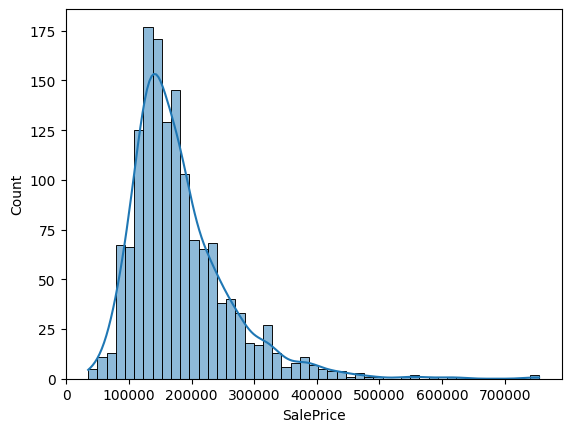

In [11]:
sns.histplot(data=house_df, x='SalePrice', kde=True)

In [12]:
log_saleprice = np.log1p(house_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

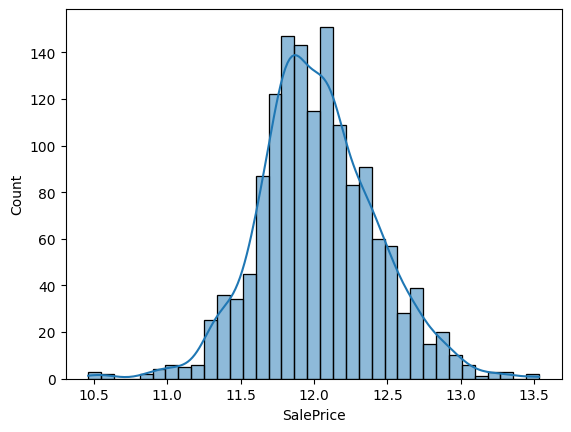

In [13]:
sns.histplot(x=log_saleprice,kde=True)

In [14]:
original_SalePrice =house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

In [15]:
house_df.drop(columns=['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], inplace=True)

In [16]:
house_df.fillna(house_df.mean(numeric_only=True),inplace=True)

In [17]:
isnull_series =house_df.isnull

In [18]:
house_df.mean(numeric_only=True)

MSSubClass          56.897260
LotFrontage         70.049958
LotArea          10516.828082
OverallQual          6.099315
OverallCond          5.575342
YearBuilt         1971.267808
YearRemodAdd      1984.865753
MasVnrArea         103.685262
BsmtFinSF1         443.639726
BsmtFinSF2          46.549315
BsmtUnfSF          567.240411
TotalBsmtSF       1057.429452
1stFlrSF          1162.626712
2ndFlrSF           346.992466
LowQualFinSF         5.844521
GrLivArea         1515.463699
BsmtFullBath         0.425342
BsmtHalfBath         0.057534
FullBath             1.565068
HalfBath             0.382877
BedroomAbvGr         2.866438
KitchenAbvGr         1.046575
TotRmsAbvGrd         6.517808
Fireplaces           0.613014
GarageYrBlt       1978.506164
GarageCars           1.767123
GarageArea         472.980137
WoodDeckSF          94.244521
OpenPorchSF         46.660274
EnclosedPorch       21.954110
3SsnPorch            3.409589
ScreenPorch         15.060959
PoolArea             2.758904
MiscVal   